In [1]:
import pandas as pd
import numpy as np
import os
from pandasql import sqldf
from scipy import stats
import time
import networkx as nx
import simple_icd_10_cm as cm
import random

In [ ]:
# Calculate overlap between top 3/5 RR connections for each node across the same model using different subsets of the data
# or different models

In [167]:
dataset_1 = '...' # Insert path to csv containing results including columns: Source Node ("D1"), Destination Node ("D2") and RR ("RR")
dataset_2 = '...' # Insert path to csv to compare against containing results in same format

df1 = pd.read_csv(dataset_1) 
df2 = pd.read_csv(dataset_2) 

dx_list = df1['D1'].value_counts().index # List of nodes

In [164]:
top_3_total = 0
top_5_total = 0
for dx in dx_list:
    d1 = df1[df1['D1']== dx].sort_values(by=['RR'],ascending=False) # Sort first dataset into descending order by RR
    d2 = df2[df2['D1']==dx].sort_values(by=['RR'],ascending=False) #  Sort second dataset into descending order by RR
    top_3_total += len(set(d1[:3]['D2']).intersection(set(d2[:3]['D2']))) # Amount of overlap between first 3 values
    top_5_total += len(set(d1[:5]['D2']).intersection(set(d2[:5]['D2']))) # Amount of overlap between first 5 values
    
top_3_percent = top_3_total/(len(dx_list)*3) # % overlap for top 3 connections across all nodes 
top_5_percent = top_5_total/(len(dx_list)*5) # % overlap for top 5 connections across all nodes 

In [3]:
# Construct comparison matrices

In [11]:
comp_matrix = "..." # Insert path to csv containing matrix comparing distances between models
df = pd.read_csv(comp_matrix, index_col = ' ')

df

,1k,10k,20k,50k,120k
,,,,,
1k,NaN,NaN,NaN,NaN,NaN
10k,0.204,NaN,NaN,NaN,NaN
20k,0.200,0.536,NaN,NaN,NaN
50k,0.228,0.568,0.720,NaN,NaN
120k,0.244,0.576,0.704,0.788,NaN


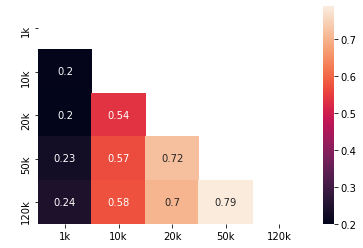

In [12]:
matrix_mask = np.triu(df) # Create mask so only get lower matrix
plot = sns.heatmap(df, annot=True, mask=matrix_mask)
fig = plot.get_figure()
# fig.savefig('BNF section top 5 plot.jpg')